#Tutorial de python para usar AntsPyx

En este tutorial vamos a realizar tareas parecidas a las que hemos realizado en el de nilearn pero usando la libreria ANTsPy.

In [1]:
import ants
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

In [2]:
np.set_printoptions(precision=2, suppress=True)
data_path = 'data-tutorial'

PET_filename = 'sub-B10709603_ses-m00_AV1451.avg.nii'

T1_filename = 'sub-B10709603_ses-m00_T1.nii'

Mask_filename = 'sub-B10709603_ses-m00_T1_mask.nii'

##Trabajo con PET

In [5]:
# Load the image and chech the header content
PET = ants.image_read(os.path.join(data_path, PET_filename))
PET

ANTsImage (RPI)
	 Pixel Type : float (float32)
	 Components : 1
	 Dimensions : (128, 128, 47)
	 Spacing    : (2.7344, 2.7344, 3.27)
	 Origin     : (-173.6328, 173.6328, -164.4202)
	 Direction  : [ 1.  0.  0.  0. -1.  0.  0.  0.  1.]

Si imprimimos el contenido de nuestra variable podremos ver el header donde se guardan los metadatos del archivo. Podemos apreciar campos relevantes como pueden ser la dimensión o el tamaño de los voxels dentro de la key 'Spacing'.

Hacemos el plot de un histograma con las intensidades que aparecen en la imagen PET.

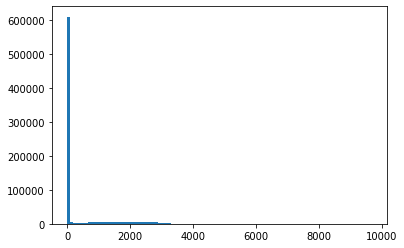

In [7]:
# Plot an histogram of the PET image
plt.hist(PET.numpy().reshape(-1), bins=100)
plt.show()

Como podemos apreciar en el histograma, existe un gran numero de voxels dentro de la imagen PET que tienen un valor muy cercano al 0. Esto es debido a que dentro del volumen hay regiones vacías.
Vamos a imprimir el mismo histograma pero eliminando estos valores.

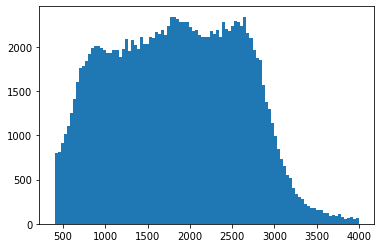

In [10]:
# Plot and histrogram of the T1 image without 0 values
plt.hist(PET.numpy().reshape(-1), bins=100, range=(400,4000))
plt.show()

Por último, mostraremos algunas slices de la PET que hemos cargado.

/home/student/.conda/envs/py39/lib/python3.9/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



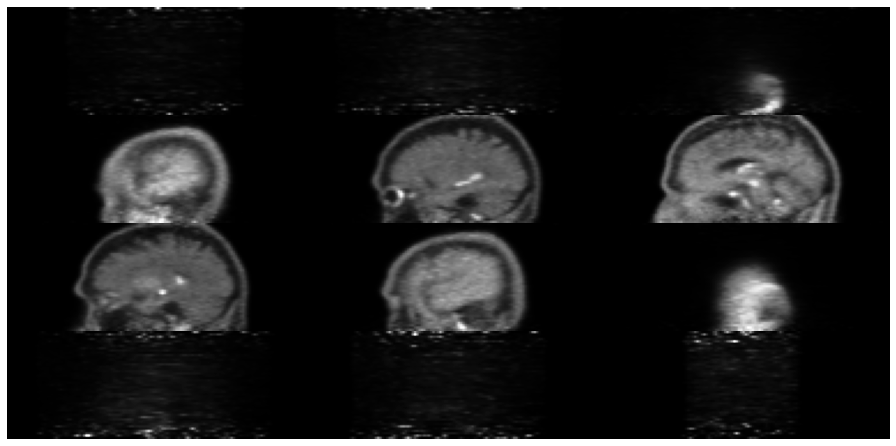

In [21]:
# Print slices of the PET image with the ants library
ants.plot(PET)

Como podemos apreciar, la calidad de este plot es mucho más baja que con el plot que se ha realizado con la libreria nilearn. Sin embargo, es mucho más eficiente.

##Trabajamos con la T1

Vamos a realizar un proceso similar al que hemos realizado previamente.

En primer lugar, cargaremos el archivo y veremos los metadatos.

In [22]:
# Load the T1 image
T1 = ants.image_read(os.path.join(data_path, T1_filename))
T1

/home/student/.conda/envs/py39/lib/python3.9/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



ANTsImage (LPI)
	 Pixel Type : float (float32)
	 Components : 1
	 Dimensions : (196, 256, 256)
	 Spacing    : (1.2, 1.0547, 1.0547)
	 Origin     : (117.513, 94.1635, -133.9469)
	 Direction  : [-1.  0.  0.  0. -1.  0.  0.  0.  1.]

En este caso podemos apreciar que las dimensiones de la imagen son mayores. También que el tamaño de los voxels es más pequeño.

Vamos a plotear un histograma con las intensidades del T1. En este caso, nos quedaremos directamente con la zona de interés.

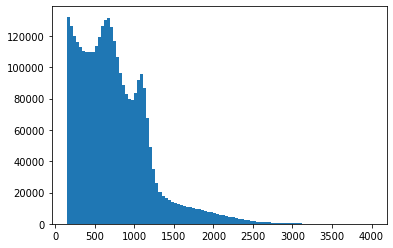

In [29]:
# Plot an historam of the T1 image
plt.hist(T1.numpy().reshape(-1), bins=100, range=(150,4000))
plt.show()

Realizamos el plot de la T1. En este caso usaremos una escala de grises ya que es más adecuada para este tipo de imagen.

/home/student/.conda/envs/py39/lib/python3.9/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



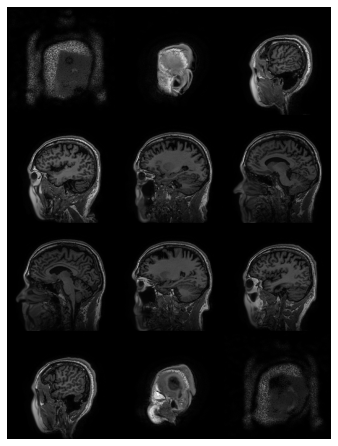

In [31]:
# Plot the T1 image
ants.plot(T1, cmap='gray')


En este caso, podemos apreciar que el plot que se realiza por defecto con esta libreria contiene mucha más información y tiene una claidad alta.

##Trabajo con la máscara

En primer lugar, vamos a cargar la máscara y mostrar los metadatos

In [32]:
# Load the mask image
Mask = ants.image_read(os.path.join(data_path, Mask_filename))
Mask

/home/student/.conda/envs/py39/lib/python3.9/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



ANTsImage (LPI)
	 Pixel Type : float (float32)
	 Components : 1
	 Dimensions : (196, 256, 256)
	 Spacing    : (1.2, 1.0547, 1.0547)
	 Origin     : (117.513, 94.1635, -133.9469)
	 Direction  : [-1.  0.  0.  0. -1.  0.  0.  0.  1.]

A continuación, vamos a realizar un plot de la máscara. En esta caso, la máscara cubre la materia gris.

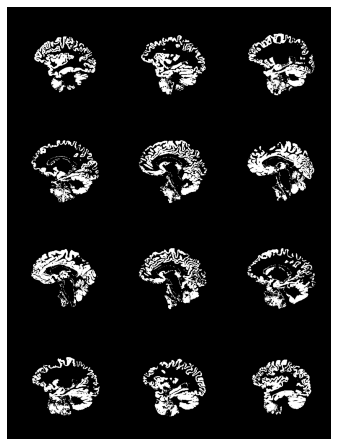

In [33]:
# Plot the mask image
ants.plot(Mask)

Vamos a aplicar la máscara a la imagen T1 para quedarnos con los valores de intensidad de la materia gris.

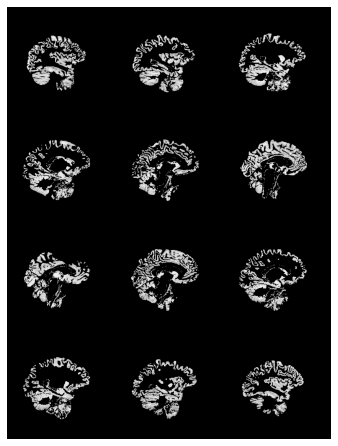

In [51]:
# Apply mask to the T1 image
T1_masked = np.multiply(T1.numpy(), Mask.numpy())
masked_image = ants.from_numpy(T1_masked)
ants.plot(masked_image)

Mostraremos el histograma de los distintos valores de intensidad que presenta la región seleccionada por la máscara.

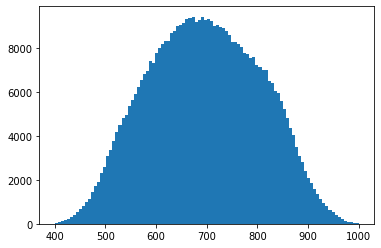

In [53]:
# Plot an histogram of the masked T1 image
plt.hist(masked_image.numpy().reshape(-1), bins=100, range=(400, 1000))
plt.show()

#Registro

Por último, una de las principales funcionalidades de esta librería es la posibilidad de realizar registros entre imagenes PET y T1. A continuación vamos a ver como.

In [55]:
# Do a register of the PET image to the T1 image
registered_image = ants.registration(fixed=T1, moving=PET, type_of_transform='SyN')

Vamos a ver el tipo de datos que almacena la imagen registrada.
Como podemos ver, se trata de un diccionario donde se guardan dos imagenes ANTsImag (warpedmovout y warpedfixout).

Además, también podemos apreciar que aparecen dos elementos más (fwdtransforms y invtransforms) que almacenan las transformaciones que se realizan para completar el registro.


In [59]:
registered_image


{'warpedmovout': ANTsImage (LPI)
 	 Pixel Type : float (float32)
 	 Components : 1
 	 Dimensions : (196, 256, 256)
 	 Spacing    : (1.2, 1.0547, 1.0547)
 	 Origin     : (117.513, 94.1635, -133.9469)
 	 Direction  : [-1.  0.  0.  0. -1.  0.  0.  0.  1.],
 'warpedfixout': ANTsImage (RPI)
 	 Pixel Type : float (float32)
 	 Components : 1
 	 Dimensions : (128, 128, 47)
 	 Spacing    : (2.7344, 2.7344, 3.27)
 	 Origin     : (-173.6328, 173.6328, -164.4202)
 	 Direction  : [ 1.  0.  0.  0. -1.  0.  0.  0.  1.],
 'fwdtransforms': ['/tmp/tmpni36euoh1Warp.nii.gz',
  '/tmp/tmpni36euoh0GenericAffine.mat'],
 'invtransforms': ['/tmp/tmpni36euoh0GenericAffine.mat',
  '/tmp/tmpni36euoh1InverseWarp.nii.gz']}

Por últmo, vamos a mostrar el contenido de las dos imágenes almacenadas en el registro.

Estas imágenes no son las superposiciones de una sobre la otra de manera directa, si no que son las imagenes que pasamos como parámetro transformadas.

En el primer caso, ploteando el warpedmovout, transformamos la moving_image (PET) sobre el espacio de la fixed_image (T1).

Es importante tener en cuenta que que lo que tenemos que plotear como background es la imagen original, y añadir poosteriormente la imagen registrada como overlay.

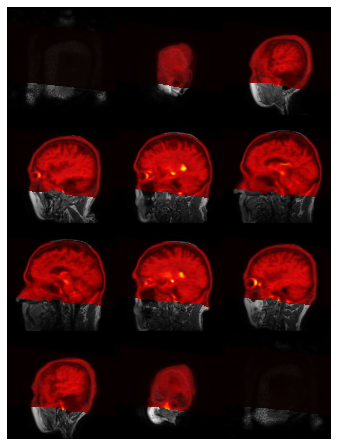

In [73]:
ants.plot(T1, overlay=registered_image['warpedmovout'], overlay_cmap='hot')

A continuación aplicaremos un threshold sobre el overlay para quedarnos con las zonas de interés y eliminar ruido. También le daremos un poco de transparencia para que se vea mejor la superposición de ambas imágenes.

/home/student/.conda/envs/py39/lib/python3.9/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



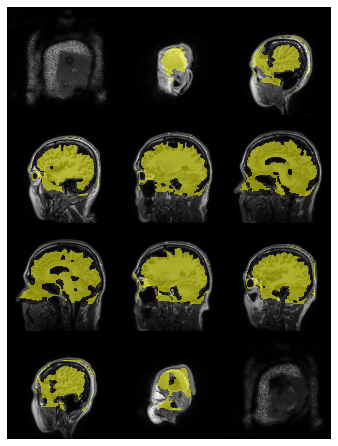

In [85]:
# Apply a threshold to the PET image
thresholded_PET = ants.threshold_image(registered_image['warpedmovout'], 1500)

# Plot the superposition
ants.plot(T1, overlay=thresholded_PET, overlay_cmap='gnuplot', overlay_alpha=0.5)

En el segundo caso, ploteando warpedfixedout, transformamos la fixed_image (T1) sobre el espacio de la moving_image (T1).

Este método no se suele usar ya que lo que interesa normalmente es trabajar en el espacio con mayor dimensionalidad.

/home/student/.conda/envs/py39/lib/python3.9/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



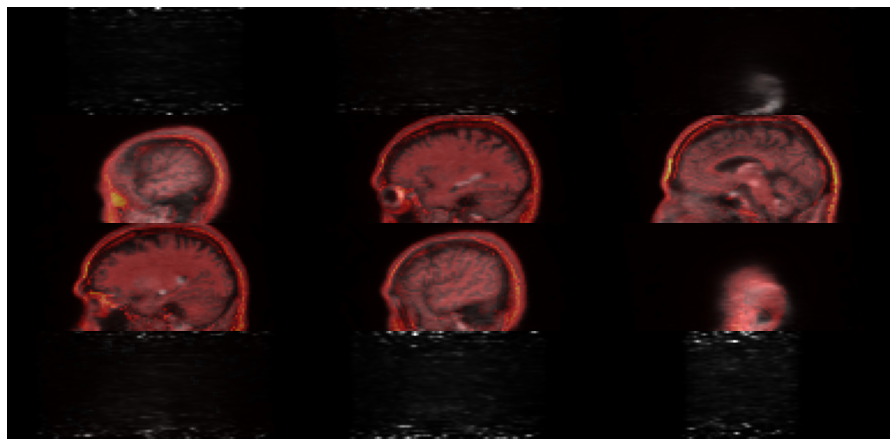

In [87]:
ants.plot(PET, overlay=registered_image['warpedfixout'], overlay_cmap='hot', overlay_alpha=0.5)

Ahora vamos a usar el registro para, crear un histograma de la intensidad de la materia gris aplicando la máscara que previamente hemos aplicado al T1, a la imagen PET transformada.

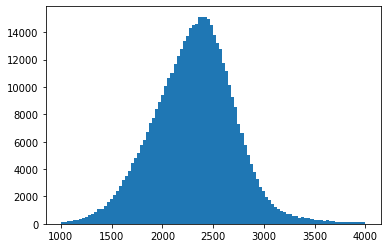

In [91]:
# Apply mask to the registered PET image
registered_PET_masked = np.multiply(registered_image['warpedmovout'].numpy(), Mask.numpy())
registered_PET_masked_image = ants.from_numpy(registered_PET_masked)

# Plot the histogram of the masked PET image
plt.hist(registered_PET_masked_image.numpy().reshape(-1), bins=100, range=(1000, 4000))
plt.show()